# Preprocessing

In [50]:
from PyPDF2 import PdfFileReader
import pandas as pd
from tqdm import tqdm
import csv
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import textract

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
import sklearn.decomposition

## Create dataset

In [16]:
db = "db.csv"
articles_path = "/Users/antoniozappia/Desktop/Articles/"

In [17]:
ds = pd.read_csv(db, sep=",", quotechar='"', quoting=csv.QUOTE_ALL, header=None, names=["title", "text"])

In [18]:
ds

,title,text
0,A Generic Model for Emotional AI in Real-Time ...,changetext
1,A Path Toward Explainable AI and Autonomous Ad...,changetext
2,A vulnerability analysis Theorising the impact...,changetext
3,An Intelligent Combination Assessing the Impac...,changetext
4,Artificial intelligence and the new forms of i...,changetext
5,Artificial intelligence approaches for modelin...,changetext
6,Artificial Intelligence in Neuroeducation The ...,changetext
7,Emotion Model for Artificial Intelligence and ...,changetext
8,Examining the Impact of Artificial Intelligenc...,changetext
9,Intelligent Conversational Agents in Mental He...,changetext


In [19]:
l = []
for i in tqdm(ds.index):
    try:
        text = textract.process(articles_path + ds.iloc[i].title + ".pdf", method='pdfminer')
        l.append(text)
    except:
        l.append("changetext")
ds["text"] = l

100%|██████████| 21/21 [00:47<00:00,  2.28s/it]


In [20]:
ds.drop((ds[ds["text"]=="changetext"]).index, inplace=True)
ds.reset_index(drop=True, inplace=True)
ds.to_csv("/Users/antoniozappia/Desktop/new_db.csv")

## Improve NLP

In [135]:
ds_path = "new_db.csv"

In [136]:
def clean_text(text):
    txt = text.replace("\n", " ")
    lemmatizer = WordNetLemmatizer() #Lemmatizer 
    stop_words = set(stopwords.words("english")) #Set of all stopwords in English
    tokenizer = RegexpTokenizer("[a-zA-Z]+")
    words = tokenizer.tokenize(txt)
    filtered_words = [] #New list for each rows
    for word in words:
        w = word.lower()
        if w not in stop_words and word.isalpha():
            word = PorterStemmer().stem(w)
            filtered_words.append(lemmatizer.lemmatize(w,"v")) #Append all word with tag in possible tag. The word is defined with lemm. The word must not be present in the stopwords
    return filtered_words #Join the list to string

In [137]:
ds = pd.read_csv(ds_path)

In [138]:
ds.drop([8], inplace=True)
ds.reset_index(inplace=True, drop=True)

In [139]:
ds

,Unnamed: 0,title,text
0,0,A Generic Model for Emotional AI in Real-Time ...,"b'See discussions, stats, and author profiles ..."
1,1,A Path Toward Explainable AI and Autonomous Ad...,b'REVIEW\npublished: 25 June 2020\ndoi: 10.338...
2,2,A vulnerability analysis Theorising the impact...,b'computer law & security review 38 (2020) 105...
3,3,An Intelligent Combination Assessing the Impac...,b'An Intelligent Combination: Assessing the Im...
4,4,Artificial intelligence approaches for modelin...,b'Artificial intelligence approaches for\nmode...
5,5,Artificial Intelligence in Neuroeducation The ...,b'Artificial Intelligence in Neuroeducation: T...
6,6,Emotion Model for Artificial Intelligence and ...,b'Emotion Model for Artificial Intelligence an...
7,7,Examining the Impact of Artificial Intelligenc...,b'International Journal of Computational Intel...
8,9,iSAM Personalizing an Artificial Intelligence ...,"b'See discussions, stats, and author profiles ..."
9,10,MODELLING OF TRAVEL BEHAVIOUR OF STUDENTS USIN...,"b'ARCHIVES OF TRANSPORT \nVolume 51, Issue 3, ..."


In [140]:
# open dataset and use the function
del ds["Unnamed: 0"]

In [147]:
ds['new_text'] = ds['text'].apply(lambda x: x.replace('\n', ''))

In [145]:
ds["token"] = [clean_text(t[1:]) for t in ds.text]

In [146]:
ds

,title,text,new_text,token
0,A Generic Model for Emotional AI in Real-Time ...,"b'See discussions, stats, and author profiles ...","b'See discussions, stats, and author profiles ...","[see, discussions, stats, author, profile, pub..."
1,A Path Toward Explainable AI and Autonomous Ad...,b'REVIEW\npublished: 25 June 2020\ndoi: 10.338...,b'REVIEW\npublished: 25 June 2020\ndoi: 10.338...,"[review, npublished, june, ndoi, fnbot, n, na,..."
2,A vulnerability analysis Theorising the impact...,b'computer law & security review 38 (2020) 105...,b'computer law & security review 38 (2020) 105...,"[computer, law, security, review, n, navailabl..."
3,An Intelligent Combination Assessing the Impac...,b'An Intelligent Combination: Assessing the Im...,b'An Intelligent Combination: Assessing the Im...,"[intelligent, combination, assess, impact, nha..."
4,Artificial intelligence approaches for modelin...,b'Artificial intelligence approaches for\nmode...,b'Artificial intelligence approaches for\nmode...,"[artificial, intelligence, approach, nmodeling..."
5,Artificial Intelligence in Neuroeducation The ...,b'Artificial Intelligence in Neuroeducation: T...,b'Artificial Intelligence in Neuroeducation: T...,"[artificial, intelligence, neuroeducation, inf..."
6,Emotion Model for Artificial Intelligence and ...,b'Emotion Model for Artificial Intelligence an...,b'Emotion Model for Artificial Intelligence an...,"[emotion, model, artificial, intelligence, n, ..."
7,Examining the Impact of Artificial Intelligenc...,b'International Journal of Computational Intel...,b'International Journal of Computational Intel...,"[international, journal, computational, intell..."
8,iSAM Personalizing an Artificial Intelligence ...,"b'See discussions, stats, and author profiles ...","b'See discussions, stats, and author profiles ...","[see, discussions, stats, author, profile, pub..."
9,MODELLING OF TRAVEL BEHAVIOUR OF STUDENTS USIN...,"b'ARCHIVES OF TRANSPORT \nVolume 51, Issue 3, ...","b'ARCHIVES OF TRANSPORT \nVolume 51, Issue 3, ...","[archive, transport, nvolume, issue, n, n, nis..."


In [45]:
all_text = []
for i in range(len(ds)):
    all_text += ds["token"].iloc[i]

In [47]:
#array of text is vectorized on unique word (words are counted)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_text)

In [48]:
#From count matrix is computed tfidf value for each word and each product
tfidf = sklearn.feature_extraction.text.TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
Z = tfidf.fit_transform(X)

In [51]:
# the vector of label word for each column in the matrix
feature_names = vectorizer.get_feature_names()

In [52]:
#Dimensionality reduction trough svd (Singular Value Decomposition)
svd = sklearn.decomposition.TruncatedSVD(n_components=1000, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
Y = svd.fit_transform(Z)

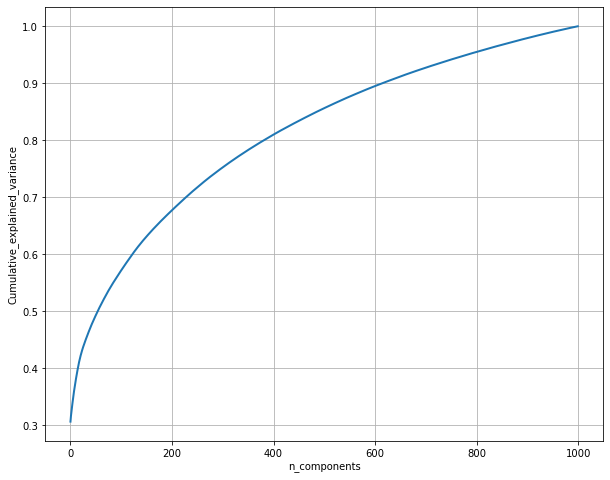

In [54]:
percentage_var_explained = svd.explained_variance_ / np.sum(svd.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(figsize=(10, 8))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [58]:
svd = sklearn.decomposition.TruncatedSVD(n_components=600, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
Y = svd.fit_transform(Z)

In [59]:
features = [feature_names[i] for i in svd.components_[0].argsort()[::-1]]
best_features = features[:600]
len(best_features)

600

In [60]:
#best feature are most weighting word in svd truncated matrix
best_features[:50]

['cid',
 'model',
 'social',
 'human',
 'represent',
 'nsystem',
 'ed',
 'larg',
 'element',
 'nintellig',
 'visual',
 'associ',
 'nwith',
 'number',
 'question',
 'aggreg',
 'becom',
 'saudi',
 'end',
 'nthi',
 'requir',
 'acm',
 'combin',
 'spatial',
 'improv',
 'abil',
 'rule',
 'direct',
 'con',
 'infer',
 'share',
 'implement',
 'law',
 'challeng',
 'product',
 'back',
 'proceed',
 'express',
 'psycholog',
 'ntion',
 'context',
 'role',
 'success',
 'set',
 'vulner',
 'advanc',
 'depend',
 'cell',
 'vigil',
 'take']

#### KMeans

In [37]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([" ".join(x) for x in ds.token])
X.shape

(16, 9584)

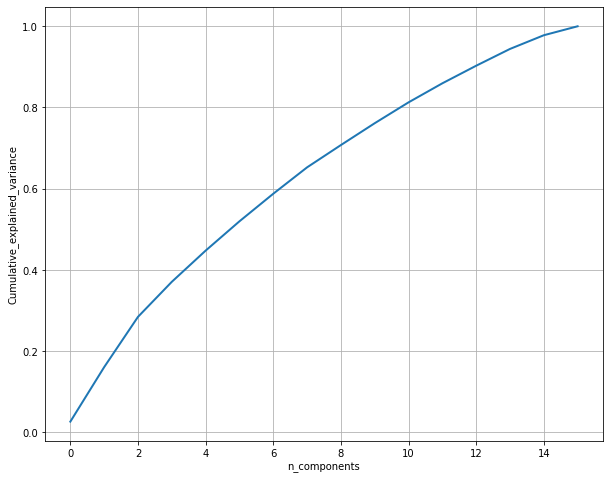

In [38]:
svd = TruncatedSVD(n_components = 9500)
svd_800 = svd.fit_transform(X)

percentage_var_explained = svd.explained_variance_ / np.sum(svd.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(figsize=(10, 8))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [44]:
svd = TruncatedSVD(n_components = 9)
svd_9 = svd.fit_transform(X)

In [45]:
def elbow_method(X, l, plot_result = False):
    elbow = {} #Create empty dictionary
    for k in tqdm(l): #For loop for each element in list l
        elbow_model = KMeans(n_clusters=k) #KMeans algorithm from scikit-learn with number cluster = K
        elbow_model.fit_predict(X) #Fit and predict respect matrix X obtained from SVD Method
        elbow[k] = elbow_model.inertia_ #Save in dictionary key = k and value for this key equal to inertia
    return elbow

In [46]:
from sklearn.cluster import KMeans
elbow = {}
for k in tqdm(range(1, 17)):
    elbow_model = KMeans(n_clusters=k)
    elbow_model.fit_predict(svd_9)
    elbow[k] = elbow_model.inertia_

100%|██████████| 16/16 [00:00<00:00, 59.12it/s]


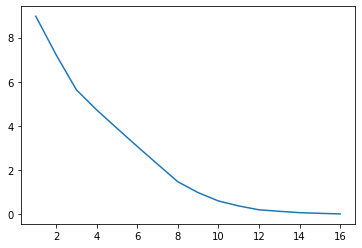

In [47]:
plt.plot(list(elbow.keys()), list(elbow.values()))

In [50]:
from kneed import  KneeLocator
kl = KneeLocator(range(1,11), list(elbow.values())[:10], curve="convex", direction="decreasing")
kl.knee

3

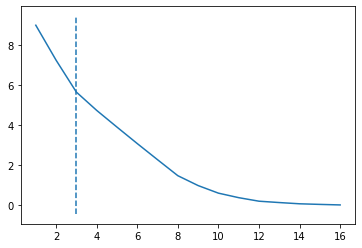

In [51]:
plt.plot(list(elbow.keys()), list(elbow.values()))
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')